In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot
from matplotlib.colors import ListedColormap as lcmap
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from scipy.spatial import distance_matrix

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# define constants
IMG_H = 28
IMG_W = 28
NUM_DIGITS = 10
INTENSITY_THRESHOLD = 127

# read data
data_frame = pd.read_csv('C:/sagar/mnist/mnist_test.csv',dtype=np.int32,header=None)
NUM_TRAIN_IMAGES = data_frame.shape[0]
NUM_PIXELS = data_frame.shape[1]-1

In [3]:
# re-format data
def reformat_data(data_frame):
    np_data_frame = data_frame.values
    images = np_data_frame[:,1:]
    labels = np_data_frame[:,0]
    
    return [images, labels]

[images_train, labels_train] = reformat_data(data_frame)

In [4]:
images = images_train
labels = labels_train

0.17592149944678703


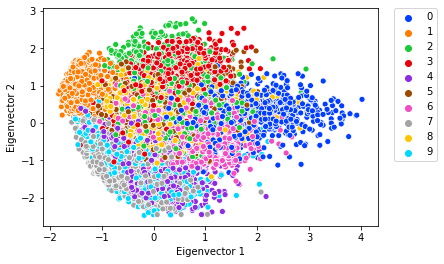

In [5]:
components = 2
pca = PCA(n_components=components, whiten=True, svd_solver='full')
pca.fit(images)
print(sum(pca.explained_variance_ratio_))
pca_images = pca.transform(images)
sns.scatterplot(pca_images[:,0], pca_images[:,1], hue=labels, palette=sns.color_palette("bright", 10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Eigenvector 1')
plt.ylabel('Eigenvector 2')
plt.show()

0.7896562218666077


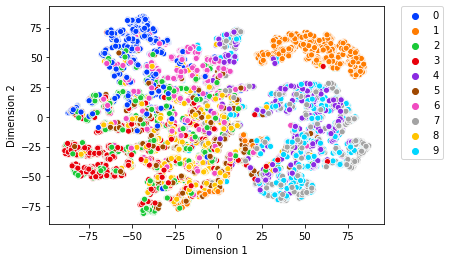

In [6]:
tsne = TSNE(n_components=2)
em = tsne.fit_transform(pca_images)
print(tsne.kl_divergence_)
sns.scatterplot(em[:,0], em[:,1], hue=labels, palette=sns.color_palette("bright", 10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

0.8316293793770142
1.9652321338653564


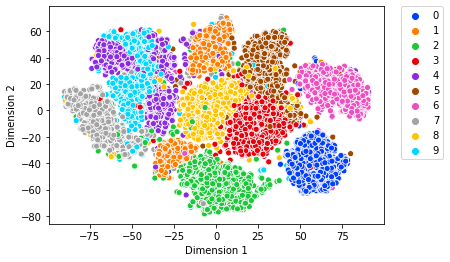

In [7]:
components = 50
pca = PCA(n_components=components, whiten=True, svd_solver='full')
pca.fit(images)
print(sum(pca.explained_variance_ratio_))
pca_images = pca.transform(images)
tsne = TSNE(n_components=2)
em = tsne.fit_transform(pca_images)
print(tsne.kl_divergence_)
sns.scatterplot(em[:,0], em[:,1], hue=labels, palette=sns.color_palette("bright", 10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [14]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=10)
model.fit(images)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [25]:
predicted_y = model.labels_
print("Accuracy Score is : \n", round(accuracy_score(labels, predicted_y)*100,2))
print()
print("confusion matrix : \n")
temp = confusion_matrix(labels, predicted_y)
for i in range(10):
    print(temp[i])
print()
print("classification report :")
print(classification_report(labels, predicted_y))

Accuracy Score is : 
 7.38

confusion matrix : 

[  14   38   21 2804    3 2501   17  182  181  162]
[   9    6 2978    0 3717    0    9    8   10    5]
[  69  173  352   10  365   97 4195  212  158  327]
[  48  176  104   15  427  126  216   57 1036 3926]
[1942 3186  310   10  159   11   38  164   21    1]
[ 344  374  800   62  165  252   15  123 1509 1777]
[   1   82  223   98  271  122   87 4914   92   28]
[3777 1791  283   15  327   14   39    4   10    5]
[ 179  192  419   38  297   32   55   47 3454 1138]
[2461 2900  117   37  240   19   13    8   69   85]

classification report :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5923
           1       0.00      0.00      0.00      6742
           2       0.06      0.06      0.06      5958
           3       0.00      0.00      0.00      6131
           4       0.03      0.03      0.03      5842
           5       0.08      0.05      0.06      5421
           6       0.02    

In [3]:
# read data
data_frame = pd.read_csv('C:/sagar/mnist/mnist_train.csv',dtype=np.int32,header=None)
NUM_TRAIN_IMAGES = data_frame.shape[0]
NUM_PIXELS = data_frame.shape[1]-1
# re-format data
def reformat_data(data_frame):
    np_data_frame = data_frame.values
    images = np_data_frame[:,1:]
    labels = np_data_frame[:,0]
    
    return [images, labels]

[images_train, labels_train] = reformat_data(data_frame)
train_X = images_train
train_y = labels_train

In [4]:
# read data
data_frame = pd.read_csv('C:/sagar/mnist/mnist_test.csv',dtype=np.int32,header=None)
NUM_TRAIN_IMAGES = data_frame.shape[0]
NUM_PIXELS = data_frame.shape[1]-1
# re-format data
def reformat_data(data_frame):
    np_data_frame = data_frame.values
    images = np_data_frame[:,1:]
    labels = np_data_frame[:,0]
    
    return [images, labels]

[images_train, labels_train] = reformat_data(data_frame)
test_X = images_train
test_y = labels_train

In [ ]:
components = 50
pca = PCA(n_components=components, whiten=True, svd_solver='full')
pca.fit(train_X)
pca_train_X = pca.transform(train_X)
pca_test_X = pca.transform(test_X)
range_ = list(range(1, 11))
w_ = ['uniform', 'distance']
grid_params = dict(n_neighbors=range_, weights=w_)
#print(grid_params)
grid = GridSearchCV(KNeighborsClassifier(), grid_params, cv=5, scoring='accuracy', verbose=1, n_jobs=-1, iid=False)
results = grid.fit(pca_train_X, train_y)
print(results.best_score_)
print(results.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [ ]:
# params = {'C': [0.1, 1, 10, 100, 1000],  
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
#               'kernel': ['rbf', 'poly', 'sigmoid']}  
params = {'C': [100],  
          'gamma': [0.01], 
          'kernel': ['rbf']}  

# svc = SVC() 
# grid = GridSearchCV(svc, param_grid = params, refit = True, verbose = 2, n_jobs=-1) 
# grid.fit(train_X, train_y)
model = SVC(C=200, gamma=0.01, kernel='rbf')
model.fit(train_X, train_y)